Link do tutorial: https://docs.obspy.org/tutorial

# UTCDateTime

In [1]:
# manipula as informações no formato UTC
from obspy.core import UTCDateTime
# pode ser fornecido em diferentes formatos
print(UTCDateTime("2012-09-07T12:15:00")) # string UTC
print(UTCDateTime(2012, 9, 7, 12, 15, 0)) # list UTC
print(UTCDateTime(1347020100.0)) # number UTC

2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z
2012-09-07T12:15:00.000000Z


In [2]:
# timezones podem ser relacionadas acrescentando uma operação no final
# uma zona com 2h a frente, tem início o UTC correspondente a -02:00
print(UTCDateTime("2012-09-07T12:15:00+02:00"))

2012-09-07T10:15:00.000000Z


In [4]:
# cada uma das propriedades do tempo UTC pode ser acessada
time = UTCDateTime("2012-09-07T12:15:00")
print("ano: ", time.year)
print("dia juliano: ", time.julday)
print("timestamp: ", time.timestamp)
print("dia da semana: ", time.weekday)

ano:  2012
dia juliano:  251
timestamp:  1347020100.0
dia da semana:  4


In [5]:
# pode-se realizar operação de soma e subtração, onde o tempo será dado em segundos
# ou realizar soma e subtração de 2 objetos UTC
time = UTCDateTime("2012-09-07T12:15:00")
print(time + 3600)
time2 = UTCDateTime(2012, 1, 1)
print(time - time2)

2012-09-07T13:15:00.000000Z
21644100.0


In [9]:
print("Horas vividas: " ,UTCDateTime("2021-11-09T07:30:00") - UTCDateTime("1995-08-06T09:00:00+03:00"))

Horas vividas:  828754200.0


# Leitura de sismogramas

In [13]:
# suporta leitura de sismogramas no formato SAC MiniSEED, GSE2, SEISAN, Q, etc.
# streams são objetos que podem conter múltiplos traces
# os traces tem o atributo trace.data para acessar os dados na matriz NumPy
# e também o atributo trace.stats para acessar os metadados em um dicionário
from obspy import read
st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print("Stream: ", st)
print()
print("Número de Traces", len(st))
print()
tr = st[0] # selecionando o traço
print("Trace: ", tr)

Stream:  1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

Número de Traces 1

Trace:  .RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


In [14]:
# acessando os metadados
tr.stats

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})

In [15]:
# acessando os dados
print("Dados do trace: ", tr.data)
print("Fatia do trace: ", tr.data[0:3])
print("Número de amostras no trace: ", len(tr))

Dados do trace:  [-38  12  -4 ..., -14  -3  -9]
Fatia do trace:  [-38  12  -4]
Número de amostras no trace:  36000


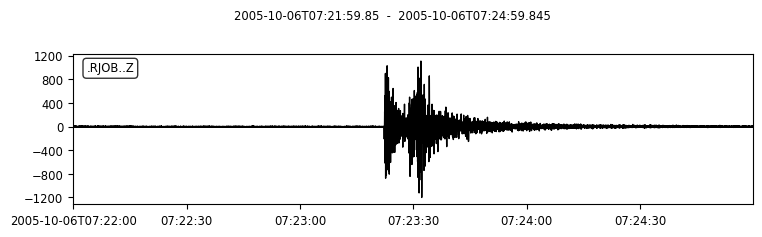

In [17]:
# gráfico do stream
st.plot();

# Gráficos

In [18]:
# vamos analisar gráficos com 1 só canal e com 3 canais
singlechannel = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(singlechannel)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


In [19]:
threechannels = read('https://examples.obspy.org/COP.BHE.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHN.DK.2009.050')
threechannels += read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(threechannels)

3 Trace(s) in Stream:
DK.COP..BHE | 2009-02-19T00:00:00.035100Z - 2009-02-19T23:59:59.985100Z | 20.0 Hz, 1728000 samples
DK.COP..BHN | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


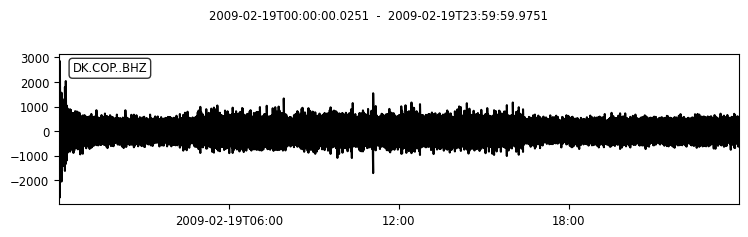

In [21]:
# gráfico simples 
singlechannel.plot(size=(800, 250));

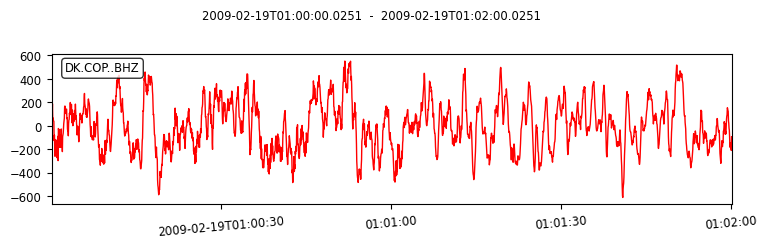

In [23]:
# gráfico customizado
dt = singlechannel[0].stats.starttime
singlechannel.plot(color='red', number_of_ticks=7, tick_rotation=5,
                   tick_format='%I:%M %p',
                   starttime=dt + 60*60, endtime=dt + 60*60 + 120);

In [24]:
# salvar o gráfico
singlechannel.plot(outfile='singlechannel.png')

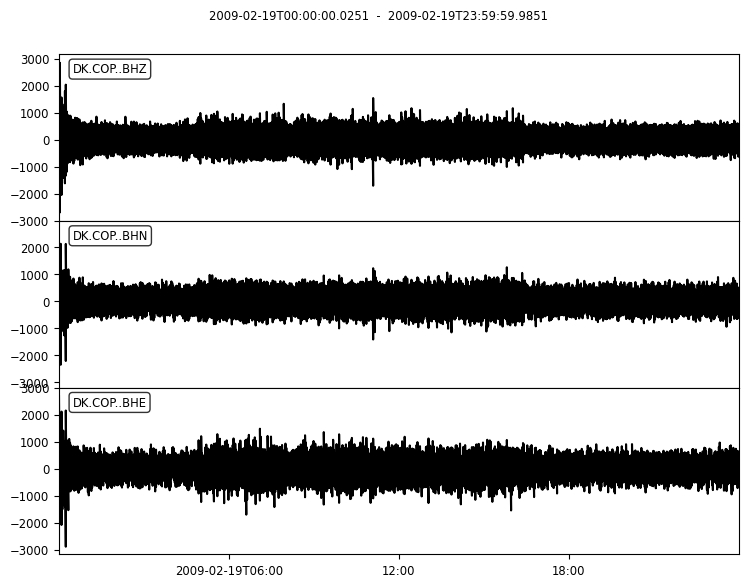

In [26]:
# gráfico de stream com múltiplos traces
threechannels.plot(size=(800, 600));

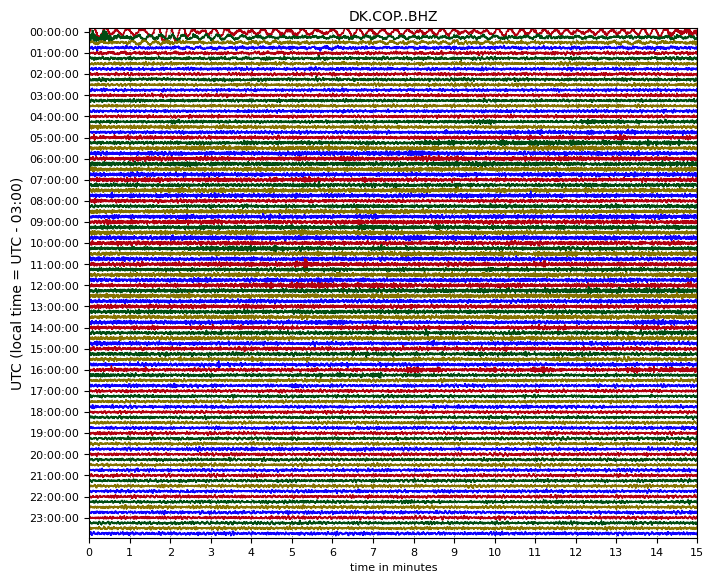

In [28]:
# dayplot - gráfico de um dia
singlechannel.plot(type='dayplot');

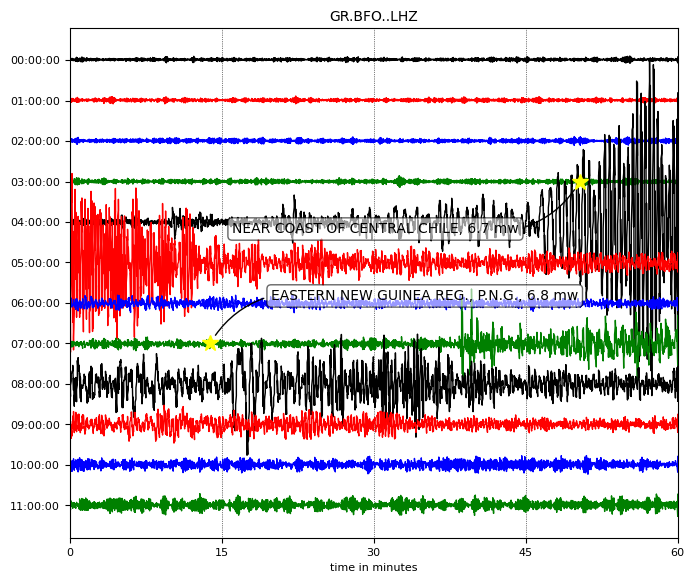

In [32]:
# eventos
# ao se marcar a magnitude dos eventos ele associa diretamente ao local e ao valor da magnitude
# se a estação fornecer estas informações
st = read("https://examples.obspy.org/GR.BFO..LHZ.2012.108")
st.filter("lowpass", freq=0.1, corners=2) # remove frequencias abaixo de 0.1
st.plot(type='dayplot', interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e3, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude' : 6.5});

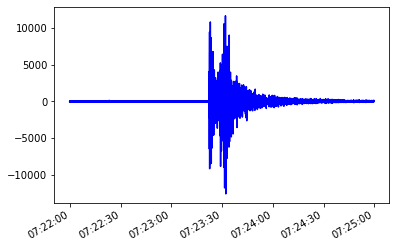

In [35]:
# gráfico no matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, 'b-')
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

# Download de data centers

Este tutorial fala como fazer download em diversos data centers https://docs.obspy.org/tutorial/code_snippets/retrieving_data_from_datacenters.html

# Filtragem

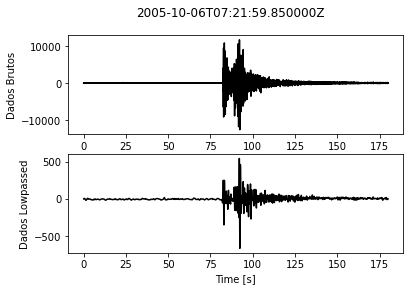

In [37]:
# no obspy existem 4 filtros: bandpass, bandstop, lowpass e highpass
import numpy as np

# leitura do sismograma
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
tr = st[0]

# filtrando com o lowpass em uma cópia do trace original
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=1.0, corners=2, zerophase=True)

# gráfico dos dados brutos e filtrados
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Dados Brutos')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Dados Lowpassed')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

# Diminuindo a taxa de amostragem

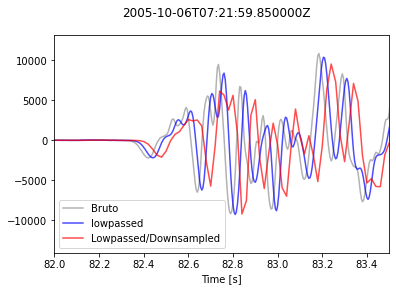

In [38]:
# um filtro lowpass é automaticamente aplicado durante a diminuição da taxa de amostragem
# para evitar o aliasing (distorções), a não ser que desabilite
st = read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
tr = st[0]

# diminuir a taxa de amostragem de 200 Hz por um fator de 4 transformando para
# 50 Hz. É automaticamente incluído um filtro lowpass com corner em 20 Hz
tr_new = tr.copy()
tr_new.decimate(factor=4, strict_length=False)

# comparação com as amostras somente filtradas com lowpass e sem diminuição
# da taxa de amostragem
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

# gráficos para comparação
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,
                  tr_new.stats.delta)
plt.plot(t, tr.data, 'k', label='Bruto', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(82, 83.5)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()

# Mesclando sismogramas

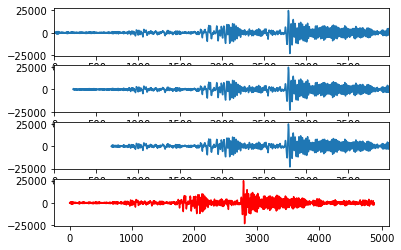

In [57]:
# 3 canais
st = read("https://examples.obspy.org/dis.G.SCZ.__.BHE")
st += read("https://examples.obspy.org/dis.G.SCZ.__.BHE.1")
st += read("https://examples.obspy.org/dis.G.SCZ.__.BHE.2")

# ordenar pelo que tem o tempo de início menor
st.sort(['starttime'])
dt = st[0].stats.starttime.timestamp # início do gráfico

# passa pelo stream, determina o intervalo de tempo em segundos julianos
# e plota os dados com o eixo x compartilhado
fig = plt.subplots(nrows=4, ncols=1, sharex=True)
for i in range(3):
    plt.subplot(4, 1, i + 1)
    t = np.linspace(st[i].stats.starttime.timestamp - dt,
                    st[i].stats.endtime.timestamp - dt,
                    st[i].stats.npts) # npts é a amostragem
    plt.plot(t, st[i].data)
    plt.xlim(st[0].stats.starttime.timestamp - dt,
             st[0].stats.endtime.timestamp - dt)
    
# mesclagem
st.merge(method=1)
plt.subplot(4, 1, 4)
t = np.linspace(st[0].stats.starttime.timestamp - dt,
                st[0].stats.endtime.timestamp - dt,
                st[0].stats.npts)
plt.plot(t, st[0].data, 'r')

# Beamforming - Análise FK

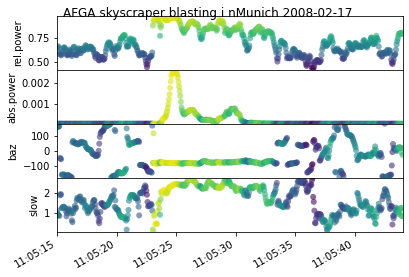

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import obspy
from obspy.core.util import AttribDict
from obspy.imaging.cm import obspy_sequential
from obspy.signal.invsim import corn_freq_2_paz
from obspy.signal.array_analysis import array_processing

# Carregando os dados
st = obspy.read("https://examples.obspy.org/agfa.mseed")

# Configurando o PAZ e coordenadas para todos os 5 canais
st[0].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.3617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0
})
st[0].stats.coordinates = AttribDict({
    'latitude': 48.108589,
    'elevation': 0.450000,
    'longitude': 11.582967
})

st[1].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 205479446.68601453,
    'gain': 1.0})
st[1].stats.coordinates = AttribDict({
    'latitude': 48.108192,
    'elevation': 0.450000,
    'longitude': 11.583120})

st[2].stats.paz = AttribDict({
    'poles': [(-0.03736 - 0.03617j), (-0.03736 + 0.03617j)],
    'zeros': [0j, 0j],
    'sensitivity': 250000000.0,
    'gain': 1.0})
st[2].stats.coordinates = AttribDict({
    'latitude': 48.108692,
    'elevation': 0.450000,
    'longitude': 11.583414})

st[3].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j)],
    'zeros': [0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[3].stats.coordinates = AttribDict({
    'latitude': 48.108456,
    'elevation': 0.450000,
    'longitude': 11.583049})

st[4].stats.paz = AttribDict({
    'poles': [(-4.39823 + 4.48709j), (-4.39823 - 4.48709j), (-2.105 + 0j)],
    'zeros': [0j, 0j, 0j],
    'sensitivity': 222222228.10910088,
    'gain': 1.0})
st[4].stats.coordinates = AttribDict({
    'latitude': 48.108730,
    'elevation': 0.450000,
    'longitude': 11.583157})

# Correção instrumental para frequência de canto de 1 Hz
paz1hz = corn_freq_2_paz(1.0, damp=0.707)
st.simulate(paz_remove='self', paz_simulate=paz1hz)

# Executa o array_processing
stime = obspy.UTCDateTime("20080217110515")
etime = obspy.UTCDateTime("20080217110545")
kwargs = dict(
    # slowness grid: X min, X max, Y min, Y max, Slow Step
    sll_x=-3.0, slm_x=3.0, sll_y=-3.0, slm_y=3.0, sl_s=0.03,
    # propriedades da janela deslizante
    win_len=1.0, win_frac=0.05,
    # propiedades da frequência
    frqlow=1.0, frqhigh=8.0, prewhiten=0,
    # saída restrita
    semb_thres=-1e9, vel_thres=-1e9, timestamp='mlabday',
    stime=stime, etime=etime
)
out = array_processing(st, **kwargs)

# Gráfico
labels = ['rel.power', 'abs.power', 'baz', 'slow']

xlocator = mdates.AutoDateLocator()
fig = plt.figure()
for i, lab in enumerate(labels):
    ax = fig.add_subplot(4, 1, i + 1)
    ax.scatter(out[:, 0], out[:, i + 1], c=out[:, 1], alpha=0.6,
               edgecolors='none', cmap=obspy_sequential)
    ax.set_ylabel(lab)
    ax.set_xlim(out[0, 0], out[-1, 0])
    ax.set_ylim(out[:, i + 1].min(), out[:, i + 1].max())
    ax.xaxis.set_major_locator(xlocator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(xlocator))
    
fig.suptitle('AFGA skyscraper blasting in Munich %s' % (
    stime.strftime('%Y-%m-%d'), ))
fig.autofmt_xdate()
fig.subplots_adjust(left=0.15, top=0.95, right=0.95, bottom=0.2, hspace=0)
plt.show()

# Envelopes de Sismograma

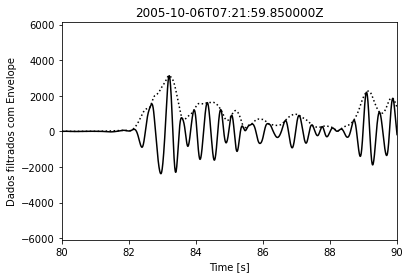

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import obspy
import obspy.signal


st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
data = st[0].data
npts = st[0].stats.npts
samprate = st[0].stats.sampling_rate

# Filtro
st_filt = st.copy()
st_filt.filter('bandpass', freqmin=1, freqmax=3, corners=2, zerophase=True)

# Envelopa os dados filtrados
data_envelope = obspy.signal.filter.envelope(st_filt[0].data)

# Gráfico
t = np.arange(0, npts / samprate, 1 / samprate)
plt.plot(t, st_filt[0].data, 'k')
plt.plot(t, data_envelope, 'k:')
plt.title(st[0].stats.starttime)
plt.ylabel('Dados filtrados com Envelope')
plt.xlabel('Time [s]')
plt.xlim(80, 90)
plt.show()

# Espectogramas

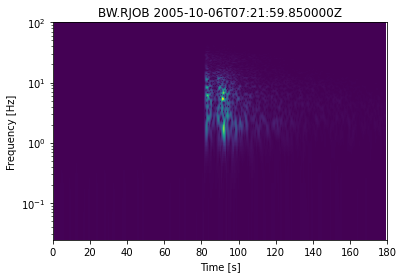

[None]

In [8]:
import obspy

st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
st.spectrogram(log=True, title='BW.RJOB ' + str(st[0].stats.starttime))

# Tutorial de seletor

In [9]:
from obspy.core import read
st = read("https://examples.obspy.org/ev0_6.a01.gse2")
st = st.select(component='Z')
tr = st[0]

In [10]:
print(tr.stats)

         network: 
         station: EV0_6
        location: 
         channel: EHZ
       starttime: 1970-01-01T01:00:00.000000Z
         endtime: 1970-01-01T01:00:59.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12000
           calib: 1.0
         _format: GSE2
            gse2: AttribDict({'auxid': '', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': 0.0, 'vang': -1.0})


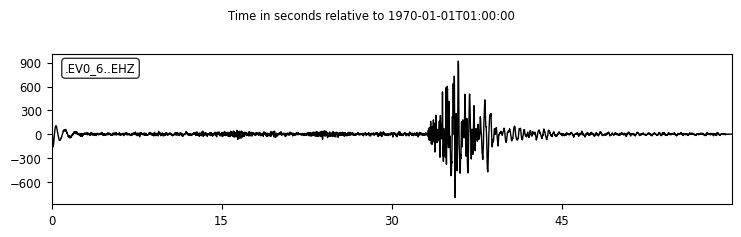

In [12]:
tr.plot(type='relative');

In [13]:
from obspy.signal.trigger import classic_sta_lta
help(classic_sta_lta)

Help on function classic_sta_lta in module obspy.signal.trigger:

classic_sta_lta(a, nsta, nlta)
    Computes the standard STA/LTA from a given input array a. The length of
    the STA is given by nsta in samples, respectively is the length of the
    LTA given by nlta in samples.
    
    Fast version written in C.
    
    :type a: NumPy :class:`~numpy.ndarray`
    :param a: Seismic Trace
    :type nsta: int
    :param nsta: Length of short time average window in samples
    :type nlta: int
    :param nlta: Length of long time average window in samples
    :rtype: NumPy :class:`~numpy.ndarray`
    :return: Characteristic function of classic STA/LTA



In [14]:
df = tr.stats.sampling_rate

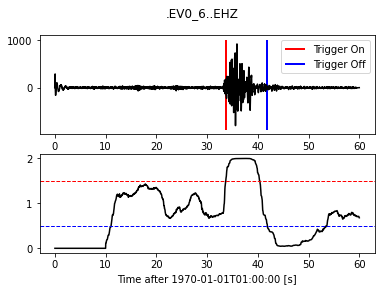

In [17]:
from obspy.signal.trigger import plot_trigger

cft = classic_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 1.5, 0.5);

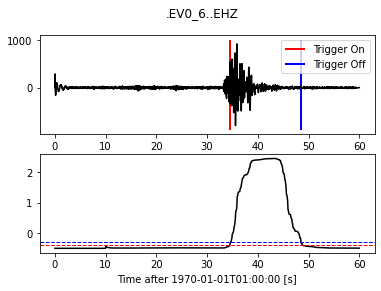

In [18]:
from obspy.signal.trigger import z_detect
cft = z_detect(tr.data, int(10 * df))
plot_trigger(tr, cft, -0.4, -0.3);

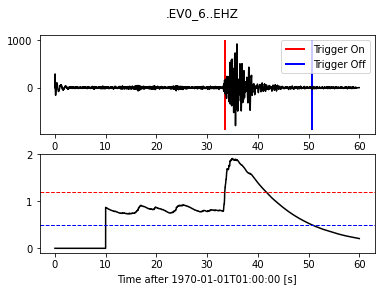

In [20]:
from obspy.signal.trigger import recursive_sta_lta
cft = recursive_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 1.2, 0.5);

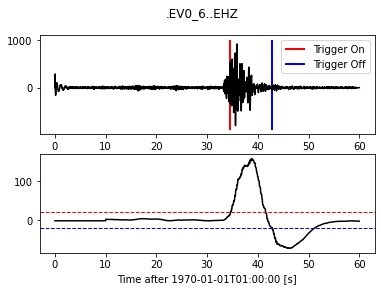

In [21]:
from obspy.signal.trigger import carl_sta_trig
cft = carl_sta_trig(tr.data, int( 5 * df), int(10 * df), 0.8, 0.8)
plot_trigger(tr, cft, 20.0, -20.0);

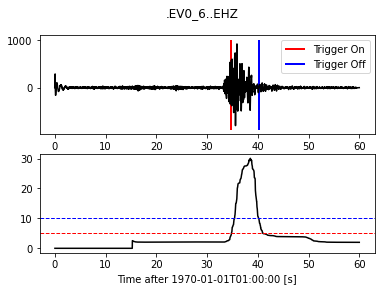

In [22]:
from obspy.signal.trigger import delayed_sta_lta
cft = delayed_sta_lta(tr.data, int(5 * df), int(10 * df))
plot_trigger(tr, cft, 5, 10);

## Exemplo de gatilho de coincidência de rede

In [24]:
from obspy.core import Stream, read
st = Stream()
files = ["BW.UH1..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH2..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH4..SHZ.D.2010.147.cut.slist.gz"]
for filename in files:
    st += read("https://examples.obspy.org/" + filename)

In [25]:
st.filter('bandpass', freqmin=10, freqmax=20) # pré-filtro opcional
from obspy.signal.trigger import coincidence_trigger
st2 = st.copy()
trig = coincidence_trigger('recstalta', 3.5, 1, st2, 3, sta=0.5, lta=10)

In [27]:
from pprint import pprint
pprint(trig)

[{'coincidence_sum': 4.0,
  'duration': 4.510000228881836,
  'similarity': {},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 3.440000057220459,
  'similarity': {},
  'stations': ['UH2', 'UH3', 'UH1'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 1, 260000),
  'trace_ids': ['BW.UH2..SHZ', 'BW.UH3..SHZ', 'BW.UH1..SHZ']},
 {'coincidence_sum': 4.0,
  'duration': 4.769999742507935,
  'similarity': {},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 30, 510000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']}]


In [28]:
# mais informações podem ser obtidas especificando `details=True`
st2 = st.copy()
trig = coincidence_trigger('recstalta', 3.5, 1, st2, 3, sta=0.5, lta=10,
                           details=True)

In [29]:
pprint(trig)

[{'cft_peak_wmean': 19.607944082266915,
  'cft_peaks': [19.719819204572108,
                19.872432918501261,
                19.622171410201297,
                19.217352795793001],
  'cft_std_wmean': 5.4497371873250913,
  'cft_stds': [5.2651551929356595,
               5.6565387957966395,
               5.7582248973698515,
               5.1190298631982154],
  'coincidence_sum': 4.0,
  'duration': 4.510000228881836,
  'similarity': {},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']},
 {'cft_peak_wmean': 6.3613580647716459,
  'cft_peaks': [8.336892751639736, 5.0043229153077409, 5.7428585273674582],
  'cft_std_wmean': 1.3933564302777983,
  'cft_stds': [1.7184368983155607, 1.0256521061778907, 1.4359802863399436],
  'coincidence_sum': 3.0,
  'duration': 3.440000057220459,
  'similarity': {},
  'stations': ['UH2', 'UH3', 'UH1'],
  'time': UTCDateTime(2010, 5, 

## Exemplo de gatilho de coincidência de redes avançado com Detecção de Similaridade

In [30]:
# ondas com eventos já conhecidos podem ser utilizados para verificar
# a similaridade das ondas de disparadores de estação única
from obspy.core import Stream, read, UTCDateTime
st = Stream()
files = ["BW.UH1..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH2..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHZ.D.2010.147.cut.slist.gz",
         "BW.UH3..SHN.D.2010.147.cut.slist.gz",
         "BW.UH3..SHE.D.2010.147.cut.slist.gz",
         "BW.UH4..SHZ.D.2010.147.cut.slist.gz"]
for filename in files:
    st += read("https://examples.obspy.org/" + filename)
st.filter('bandpass', freqmin=10, freqmax=20) # pré-filtro opcional

6 Trace(s) in Stream:
BW.UH1..SHZ | 2010-05-27T16:24:03.679998Z - 2010-05-27T16:27:53.999998Z | 50.0 Hz, 11517 samples
BW.UH2..SHZ | 2010-05-27T16:24:03.680000Z - 2010-05-27T16:27:54.000000Z | 50.0 Hz, 11517 samples
BW.UH3..SHZ | 2010-05-27T16:24:03.670000Z - 2010-05-27T16:27:53.990000Z | 50.0 Hz, 11517 samples
BW.UH3..SHN | 2010-05-27T16:24:03.669999Z - 2010-05-27T16:27:53.989999Z | 50.0 Hz, 11517 samples
BW.UH3..SHE | 2010-05-27T16:24:03.669999Z - 2010-05-27T16:27:53.989999Z | 50.0 Hz, 11517 samples
BW.UH4..SHZ | 2010-05-27T16:24:03.680000Z - 2010-05-27T16:27:54.000000Z | 50.0 Hz, 11517 samples

In [33]:
# Guardando os eventos conhecidos
times = ["2010-05-27T16:24:33.095000", "2010-05-27T16:27:30.370000"]
event_templates = {"UH3": []}
for t in times:
    t = UTCDateTime(t)
    st_ = st.select(station="UH3").slice(t, t + 2.5) # duração das ondas P
    event_templates["UH3"].append(st_)
t = UTCDateTime("2010-05-27T16:27:30.5749999")
st_ = st.select(station="UH1").slice(t, t + 2.5)
event_templates["UH1"] = [st_]

In [34]:
from obspy.signal.trigger import coincidence_trigger
st2 = st.copy()
trace_ids = {"BW.UH1..SHZ": 1,
             "BW.UH2..SHZ": 1,
             "BW.UH3..SHZ": 1,
             "BW.UH4..SHZ": 1} # somente componentes verticais com coincidencia 1
similarity_thresholds = {"UH1": 0.8, "UH3": 0.7}
trig = coincidence_trigger("classicstalta", 5, 1, st2, 4, sta=0.5,
                           lta=10, trace_ids=trace_ids,
                           event_templates=event_templates,
                           similarity_threshold=similarity_thresholds)

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\trigger.py:691: UserWarning: At least one trace's ID was not found in the trace ID list and was disregarded (BW.UH3..SHN)
  warnings.warn(msg, UserWarning)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\trigger.py:691: UserWarning: At least one trace's ID was not found in the trace ID list and was disregarded (BW.UH3..SHE)
  warnings.warn(msg, UserWarning)


In [35]:
from pprint import pprint
pprint(trig)

[{'coincidence_sum': 4.0,
  'duration': 4.110000133514404,
  'similarity': {'UH1': 0.94149447384982787, 'UH3': 1.0},
  'stations': ['UH3', 'UH2', 'UH1', 'UH4'],
  'time': UTCDateTime(2010, 5, 27, 16, 24, 33, 210000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH4..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 1.9900000095367432,
  'similarity': {'UH1': 0.65228204570577808, 'UH3': 0.72679293429214331},
  'stations': ['UH3', 'UH1', 'UH2'],
  'time': UTCDateTime(2010, 5, 27, 16, 25, 26, 710000),
  'trace_ids': ['BW.UH3..SHZ', 'BW.UH1..SHZ', 'BW.UH2..SHZ']},
 {'coincidence_sum': 3.0,
  'duration': 1.9200000762939453,
  'similarity': {'UH1': 0.89404458774338125, 'UH3': 0.74581409371425311},
  'stations': ['UH2', 'UH1', 'UH3'],
  'time': UTCDateTime(2010, 5, 27, 16, 27, 2, 260000),
  'trace_ids': ['BW.UH2..SHZ', 'BW.UH1..SHZ', 'BW.UH3..SHZ']},
 {'coincidence_sum': 4.0,
  'duration': 4.029999732971191,
  'similarity': {'UH1': 1.0, 'UH3': 1.0},
  'stations': ['UH3', 'UH

## Exemplos de selecionador

In [36]:
from obspy.core import read
from obspy.signal.trigger import pk_baer # input: segundos -> output: amostras
trace = read("https://examples.obspy.org/ev0_6.a01.gse2")[0]
df = trace.stats.sampling_rate
p_pick, phase_info = pk_baer(trace.data, df,
                            20, 60, 7.0, 12.0, 100, 100)
print(p_pick)
print()
print(phase_info)
print()
print(p_pick / df)

6894

EPU3

34.47


In [39]:
from obspy.core import read
from obspy.signal.trigger import ar_pick # input: segundos -> output: segundos
tr1 = read('https://examples.obspy.org/loc_RJOB20050801145719850.z.gse2')[0]
tr2 = read('https://examples.obspy.org/loc_RJOB20050801145719850.n.gse2')[0]
tr3 = read('https://examples.obspy.org/loc_RJOB20050801145719850.e.gse2')[0]
df = tr1.stats.sampling_rate
p_pick, s_pick = ar_pick(tr1.data, tr2.data, tr3.data, df,
                        1.0, 20.0, 1.0, 0.1, 4.0, 1.0, 2, 8, 0.1, 0.2)

print(p_pick)
print(s_pick)

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\io\gse2\libgse2.py:325: UserWarning: Checksum differs only in absolute value. If this file was written with ObsPy GSE2, this is due to a bug in the obspy.io.gse2.write routine (resolved with [3431]), and thus this message can be safely ignored.
  warnings.warn(msg, UserWarning)


30.635000228881836
31.165000915527344


# Polos e zeros, resposta de frequência

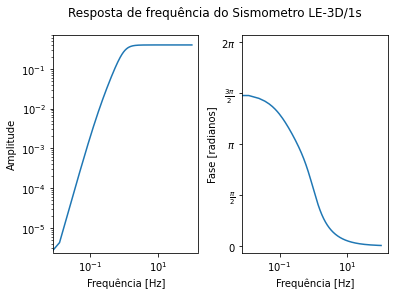

In [2]:
# visualiza a resposta de frequência
import numpy as np
import matplotlib.pyplot as plt

from obspy.signal.invsim import paz_to_freq_resp

poles = [-4.440 + 4.440j, -4.440 - 4.440j, -1.083 + 0.0j]
zeros = [0.0 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j]
scale_fac = 0.4

# intervalo de amostragem = 0.005, pontos fft = 16384
h, f = paz_to_freq_resp(poles, zeros, scale_fac, 0.005, 16384, freq=True)

plt.figure()
plt.subplot(121)
plt.loglog(f, abs(h))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')

plt.subplot(122)
phase = 2 * np.pi + np.unwrap(np.angle(h)) # converte de - pi a pi para 0 a 2pi
plt.semilogx(f, phase)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Fase [radianos]')
# ticks e tick labels nos múltiplos de pi
plt.yticks(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
    ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.ylim(-0.2, 2 * np.pi + 0.2)
# título, centralizado em ambos os sub gráficos
plt.suptitle('Resposta de frequência do Sismometro LE-3D/1s')
# aumenta o espaçamento entre os gráficos
plt.subplots_adjust(wspace=0.3)
plt.show()

# Correções/Simulações do Sismométro

## Calculando a resposta a partir dos estágios do filtro usando evalresp

### Usando um arquivo StationXML ou um objeto Inventory geral

In [5]:
# usando um cliente FDSN a resposta pode ser diretamente ligada às ondas
# e em seguida ser removida usando `Stream.remove_response()`:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

t1 = UTCDateTime("2010-09-3T16:30:00.000")
t2 = UTCDateTime("2010-09-3T17:00:00.000")
fdsn_client = Client('IRIS')
# insere as ondas do serviço web IRIS FDSN em um objeto `stream` do obspy
# e automaticamente ligada a correção da respostas
st = fdsn_client.get_waveforms(network='NZ', station='BFZ', location='10',
                               channel='HHZ', starttime=t1, endtime=t2,
                               attach_response=True)
# define uma faixa de filtro para prevenir a amplificação de ruído durante a deconvolução
pre_filt = (0.005, 0.006, 30.0, 35.0)
st.remove_response(output='DISP', pre_filt=pre_filt)

1 Trace(s) in Stream:
NZ.BFZ.10.HHZ | 2010-09-03T16:30:00.008393Z - 2010-09-03T16:59:59.998393Z | 100.0 Hz, 180000 samples

In [6]:
# alternativamente um objeto `Inventory` pode ser passado diretamente para
# o método `Stream.remove_response()` method
from obspy import read, read_inventory

# quando se usa os comandos read() e read_inventory() sem argumentos, o ObsPy utiliza um exemplo
# simplesmenete usa a onda exemplo inclusa
st = read()
# a resposta correspondente é incluída como um arquivo StationXML no ObsPy
inv = read_inventory()
# a rotina automaticamente pega a resposta correta para cada `trace`
# define uma filtro de faixa para prevenir a amplificação do ruído durante a deconvolução
pre_fil = (0.005, 0.006, 30.0, 35.0)
st.remove_response(inventory=inv, output='DISP', pre_filt=pre_filt)

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples

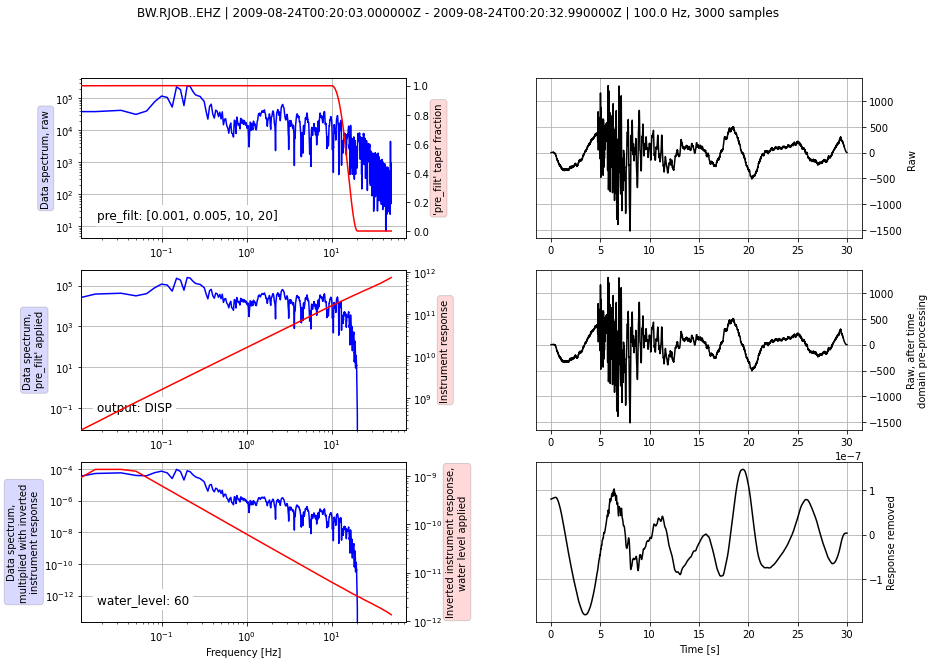

In [7]:
# Usando a opção de gráfico é possível visualizar os passos individualmente durante
# a remoção da resposta no domínio da frequência para verificar e escolher
# as opções `pre_filt` e `water_level` para estabilizar a deconvolução da
# inversão do espectro de resposta do instrumento
from obspy import read, read_inventory

st = read()
tr = st[0]
inv = read_inventory()
pre_filt = [0.001, 0.005, 10, 20]
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP",
                   water_level=60, plot=True)

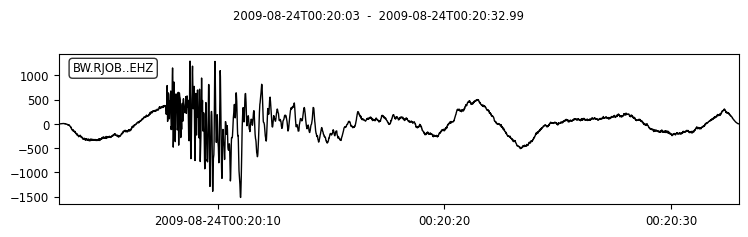

In [10]:
# dados brutos, eixo vertical em volts
st = read()[0].plot()

### Usando um arquivo RESP

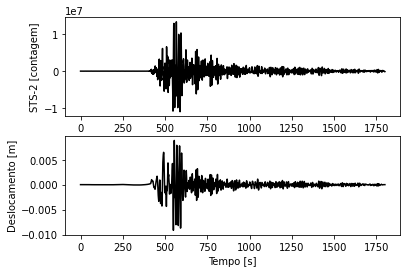

In [12]:
import matplotlib.pyplot as plt

import obspy
from obspy.core.util import NamedTemporaryFile
from obspy.clients.fdsn import Client as FDSN_Client
from obspy.clients.iris import Client as OldIris_Client

# 7.1 MW Darfiled eartquake, Nova Zelândia
t1 = obspy.UTCDateTime("2010-09-3T16:30:00.000")
t2 = obspy.UTCDateTime("2010-09-3T17:00:00.000")

# Insere a onda do serviço web IRIS FDSN em um objeto `stream` do ObsPy
fdsn_client = FDSN_Client("IRIS")
st = fdsn_client.get_waveforms('NZ', 'BFZ', '10', 'HHZ', t1, t2)

# Download e salva o arquivo de resposta do instrumento em um arquivo temporário
with NamedTemporaryFile() as tf:
    respf = tf.name
    old_iris_client = OldIris_Client()
    # insere a informação RESP a partir do serviço web "antigo" IRIS, veja obspy.fdsn
    # para acessar o novo serviços web IRIS FDSN
    old_iris_client.resp('NZ', 'BFZ', '10', 'HHZ', t1, t2, filename=respf)
    
    # faz uma cópia para manter os dados originais
    st_orig = st.copy()
    
    # define uma faixa de filtro para prevenir a amplificação dos ruídos durante a deconvolução
    pre_filt = (0.005, 0.006, 30.0, 35.0)
    
    # a data por der do arquivo bruto ou qualquer uma data na qual o arquivo
    # SEED RESP é valido
    date = t1
    
    seedresp = {'filename': respf, # RESP filename
                # quando estiver usando o `Trace/Stream.simulate()` o parâmetro
                # data pode ser omitido, e o `starttime` do `trace` é então usado.
                'date': date,
                # Unidades que podem ser retornadas pela resposta são ('DIS', 'VEL' ou 'ACC')
                'units': 'DIS'               
               }
    
    # Remove a resposta do instrumento usando a informação fornecida pelo arquivo RESP
    st.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)

# gráfico do original e simulado
tr = st[0]
tr_orig = st_orig[0]
time = tr.times()

plt.subplot(211)
plt.plot(time, tr_orig.data, 'k')
plt.ylabel('STS-2 [contagem]')
plt.subplot(212)
plt.plot(time, tr.data, 'k')
plt.ylabel('Deslocamento [m]')
plt.xlabel('Tempo [s]')
plt.show()

### Usando um arquivo Dataless/Full SEED (ou XMLSEED)

In [14]:
import obspy
from  obspy.io.xseed import Parser

st = obspy.read("https://examples.obspy.org/BW.BGLD..EH.D.2010.037")
parser = Parser("https://examples.obspy.org/dataless.seed.BW_BGLD")
st.simulate(seedresp={'filename': parser, 'units': "DIS"})

3 Trace(s) in Stream:
BW.BGLD..EHE | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHN | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples
BW.BGLD..EHZ | 2010-02-06T04:50:15.000000Z - 2010-02-06T05:01:55.000000Z | 200.0 Hz, 140001 samples

## Usando um dicionário PAZ

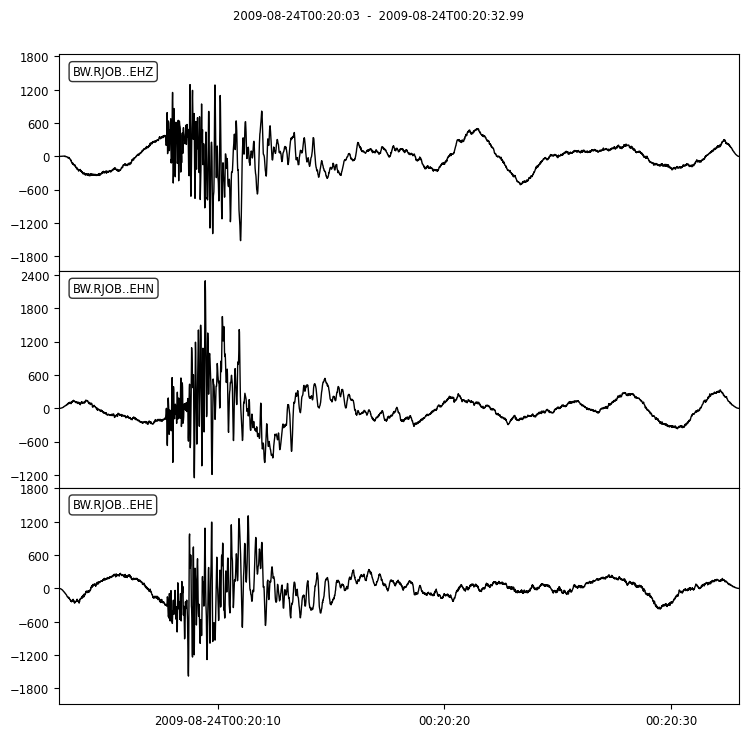

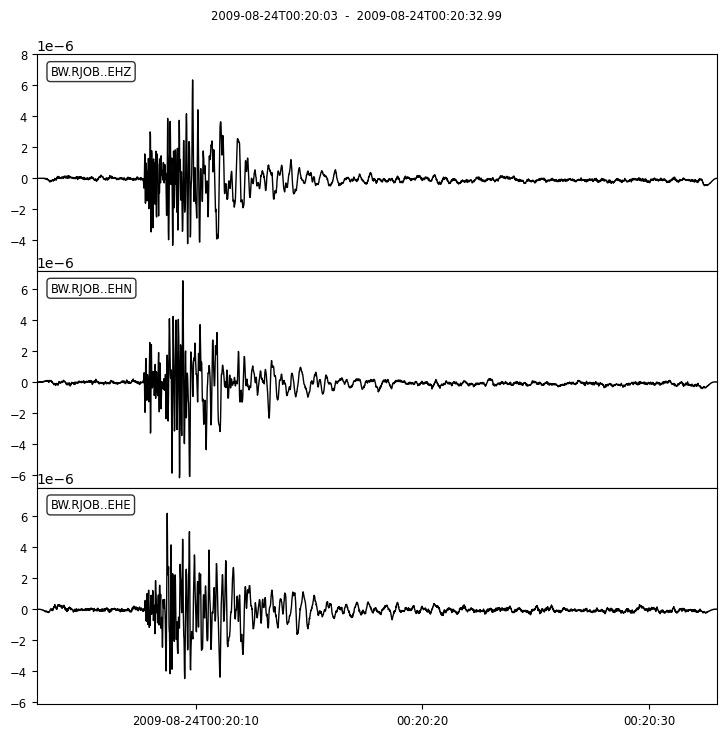

In [16]:
# A seguir é apresentado a simulação de um sismometro de 1 Hz com os polos e zeros
# PAZ - Poles and Zeros
import obspy
from obspy.signal.invsim import corn_freq_2_paz

paz_sts2 = {
    'poles': [-0.037004 + 0.037016j, -0.037004 - 0.037016j, -251.33 + 0j,
              -131.04 - 467.29j, -131.04 + 467.29j],
    'zeros': [0j, 0j],
    'gain': 6077000.0,
    'sensitivity': 2516778400.0
}
paz_1hz = corn_freq_2_paz(1.0, damp=0.707) # instrumento de 1 Hz
paz_1hz['sensitivity'] = 1.0

st = obspy.read()
# faz uma cópia para manter os dados originais
st_orig = st.copy()

# Simula o instrumento com os polos, zeros e ganhos do instrumento original e desejado
st.simulate(paz_remove=paz_sts2, paz_simulate=paz_1hz)

# gráfico original e simulado
st_orig.plot();
st.plot();

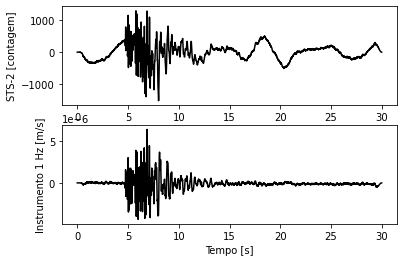

In [17]:
# gráfico customizado
import numpy as np
import matplotlib.pyplot as plt

tr = st[0]
tr_orig = st_orig[0]

t = np.arange(tr.stats.npts) / tr.stats.sampling_rate

plt.subplot(211)
plt.plot(t, tr_orig.data, 'k')
plt.ylabel('STS-2 [contagem]')
plt.subplot(212)
plt.plot(t, tr.data, 'k')
plt.ylabel('Instrumento 1 Hz [m/s]')
plt.xlabel('Tempo [s]')
plt.show()   

# Clone de um arquivo Dataless existente

In [18]:
# extensão do arquivo `dataless.seed.BW_RNON`
# criação de um clane para usar como template
from obspy import UTCDateTime
from obspy.io.xseed import Parser

p = Parser("https://examples.obspy.org/dataless.seed.BW_RNON")
blk = p.blockettes

In [19]:
# Agora pode-se usar como template a alterar somente o necessário
blk[50][0].network_code = 'BW'
blk[50][0].station_call_letters = 'RMOA'
blk[50][0].site_name = "Moar Alm, Bavaria, BW-Net"
blk[50][0].latitude = 47.761658
blk[50][0].longitude = 12.864466
blk[50][0].elevation = 815.0
blk[50][0].start_effective_date = UTCDateTime("2006-07-18T00:00.000000Z")
blk[50][0].end_effective_date = ""
blk[33][1].abbreviation_description = "Lennartz LE-3D/1 seismometer"

In [23]:
# Após isto, temos de alterar a informação de todos os 3 canais involvidos
mult = len(blk[58]) / 3
for i, cha in enumerate(['Z', 'N', 'E']):
    blk[52][i].channel_identifier = 'EH%s' % cha
    blk[52][i].location_identifier = ''
    blk[52][i].latitude = blk[50][0].latitude
    blk[52][i].longitude = blk[50][0].longitude
    blk[52][i].elevation = blk[50][0].elevation
    blk[52][i].start_date = blk[50][0].start_effective_date
    blk[52][i].end_date = blk[50][0].end_effective_date
    blk[53][i].number_of_complex_poes = 3
    blk[53][i].real_pole = [-4.444, -4.444, -1.083]
    blk[53][i].imaginary_pole = [+4.444, -4.444, +0.0]
    blk[53][i].real_pole_error = [0, 0, 0]
    blk[53][i].imaginary_pole_error = [0, 0, 0]
    blk[53][i].number_of_complex_zeros = 3
    blk[53][i].real_zero = [0.0, 0.0, 0.0]
    blk[53][i].imaginary_zero = [0.0, 0.0, 0.0]
    blk[53][i].real_zero_error = [0, 0, 0]
    blk[53][i].imaginary_zero_error = [0, 0, 0]
    blk[53][i].A0_normalization_factor = 1.0
    blk[53][i].normalization_frequency = 3.0
    # número 1 da sequência do estágio é o ganho do sismometro
    blk[58][int(i*mult)].sensitivity_gain = 400.0
    # número 2 da sequência do estágio é o ganho do digitalizador
    blk[58][int(i*mult+1)].sensitivity_gain = 1677850.0
    # número 0 da sequência do estágio é a sensitividade geral
    blk[58][int((i+1)*mult-1)].sensitivity_gain = 671140000.0

In [24]:
# após alterar, pode-se escrever em um novo arquivo
p.write_seed("tutorial.dataless.seed.BW_RMOA")

# Exporta o sismograma para o ASCII

In [ ]:
from obspy.core import read
stream = read('https://examples.obspy.org/RJOB20090824.ehz')
stream.write('outfile.ascii', format='SLIST') # 'SLIST', 'TSPAIR' ou 'SH_ASC'

# Qualquer coisa para MiniSEED

In [27]:
from __future__ import print_function

import numpy as np
from obspy import UTCDateTime, read, Trace, Stream

weather = """
00.0000 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000000
00.0002 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000001
00.0005 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000002
00.0008 0.0 ??? 4.7 97.7 1015.4 0.0 010308 000003
00.0011 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000004
00.0013 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000005
00.0016 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000006
00.0019 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000007
"""

# converte para uma arra do NumPy
data = np.fromstring(weather, dtype='|S1')

# Preencher os atributos do cabeçalho
stats = {'network': 'BW', 'station': 'RJOB', 'location': '',
         'channel': 'WLZ', 'npts': len(data), 'sampling_rate':0.1,
         'mseed': {'dataquality': 'D'}}
# ajustar o tempo corrente
stats['starttime'] = UTCDateTime()
st = Stream([Trace(data=data, header=stats)])
# escreve o arquivo ASCII (encoding=0)
st.write("weather.mseed", format="MSEED", encoding=0, reclen=256)

# verificação
st1 = read("weather.mseed")
print(st1[0].data.tostring())

b'\n00.0000 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000000\n00.0002 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000001\n00.0005 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000002\n00.0008 0.0 ??? 4.7 97.7 1015.4 0.0 010308 000003\n00.0011 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000004\n00.0013 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000005\n00.0016 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000006\n00.0019 0.0 ??? 4.7 97.7 1015.0 0.0 010308 000007\n'


C:\Users\enzoa\AppData\Local\Temp/ipykernel_20160/1167052316.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(weather, dtype='|S1')
C:\Users\enzoa\AppData\Local\Temp/ipykernel_20160/1167052316.py:32: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(st1[0].data.tostring())


# Gráfico bola de praia

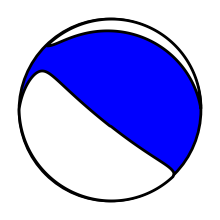

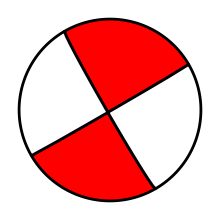

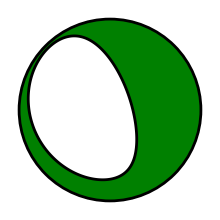

In [30]:
# gráfico que representa o mecanismo focal
from obspy.imaging.beachball import beachball

mt = [0.91, -0.98, -0.02, 1.78, -1.55, 0.47]
beachball(mt, size=200, linewidth=2, facecolor='b')

mt2 = [150, 87, 1]
beachball(mt2, size=200, linewidth=2, facecolor='r')

mt3 = [-2.39, 1.04, 1.35, 0.57, -2.94, -0.94]
beachball(mt3, size=200, linewidth=2, facecolor='g');

# Gráfico de mapa base (Basemap)

# Basemap com configurações personalizadas de projeção

Muito interessante, mas precisa ajustar as bibliotecas para conseguir rodar
https://docs.obspy.org/tutorial/code_snippets/basemap_plot_with_beachballs.html

In [34]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

from obspy import read_inventory, read_events

# Configura um mapa base personalizado
fig, ax = plt.subplots()

# configura o mapabase albers com área cônica igual (albers equal area - aea)
# lat_1 é o primeiro paralelo padrão
# lat_2 é o segundo paralelo padrão
# lon_0, lat_0 é o ponto central
m = Basemap(width=8e6, height=7e6, resolution='c', projection='aea',
            lat_1=40., lat_2=60, lon_0=35, lat_0=50, ax=ax)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='wheat', lake_color='skyblue')
# desenha as paralelas e meridianos
m.drawparallels(np.arange(-80., 81., 20.))
m.drawmeridians(np.arange(-180., 181., 20.))
m.drawmapboundary(fill_color='skyblue')
ax.set_title("Albers Equal Area Projection")

# o objeto mapa base deve ser inserido na figura, para que o ObsPy saiba que
# do mapa base e reuse
fig.bmap = m

# agora vamos plotar alguns dados para ilustrar
inv = read_inventory()
inv.plot(fig=fig, show=False)
cat = read_events()
cat.plot(fig=fig, show=False, title="", colorbar=False)

plt.show()

KeyError: 'PROJ_LIB'

# Visualizando densidade espectral de potência probabilística

In [39]:
# esta rotina é útil para interpretação por exemplo de ruídos medidos
# para controle da qualidade do local
# PPSD - Probabilistic Power Spectral Densities
from obspy import read
from obspy.io.xseed import Parser
from obspy.signal import PPSD

In [40]:
st = read("https://examples.obspy.org/BW.KW1..EHZ.D.2011.037")
tr = st.select(id="BW.KW1..EHZ")[0]

In [41]:
inv = read_inventory("https://examples.obspy.org/BW_KW1.xml")
ppsd = PPSD(tr.stats, metadata=inv)

In [42]:
# com o ppsd instanciado, pode-se adicionar os dados
# demora um pouco, caso retorne True deu tudo certo
ppsd.add(st)

True

In [44]:
# pode-se checar os intervalos de tempo que o ppsd utiliza
print(ppsd.times_processed[:2])
print("number of psd segments:", len(ppsd.times_processed))

[UTCDateTime(2011, 2, 6, 0, 0, 0, 935000), UTCDateTime(2011, 2, 6, 0, 30, 0, 935000)]
number of psd segments: 47


In [49]:
# adicionar o mesmo `stream` não modifica, o ppsd verificar se existe sobreposição
# e retorna False
ppsd.add(st)

False

In [50]:
print("número de segmentos psd:", len(ppsd.times_processed))

número de segmentos psd: 47


In [52]:
st = read("https://examples.obspy.org/BW.KW1..EHZ.D.2011.038")
ppsd.add(st)

True

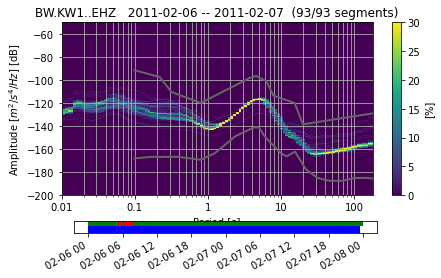

In [53]:
ppsd.plot();

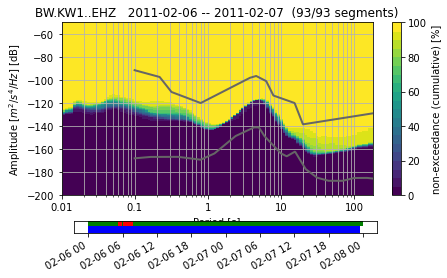

In [54]:
ppsd.plot(cumulative=True)

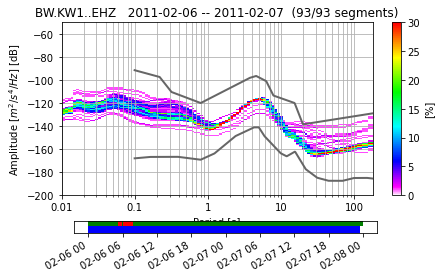

In [55]:
from obspy.imaging.cm import pqlx
ppsd.plot(cmap=pqlx)

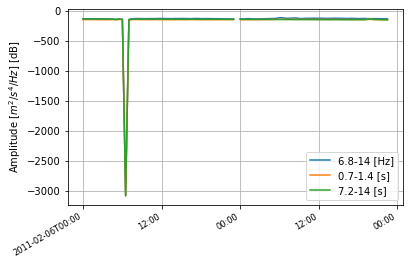

In [56]:
ppsd.plot_temporal([0.1, 1, 10])

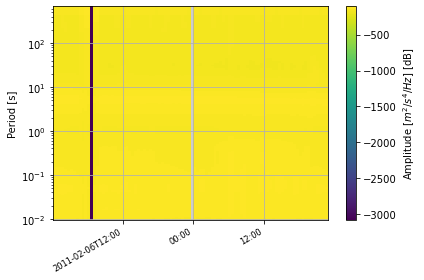

In [57]:
ppsd.plot_spectrogram()

# Função de resposta de matriz

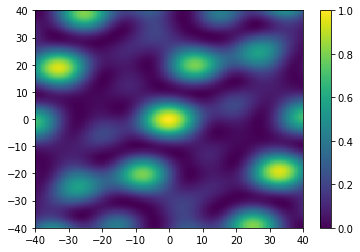

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from obspy.imaging.cm import obspy_sequential
from obspy.signal.array_analysis import array_transff_wavenumber


# gera matriz de coordenadas
coords = np.array([[10., 60., 0.], [200., 50., 0.], [-120., 170., 0.],
                  [-100., -150., 0.], [30., -220., 0.]])

# coordenadas em km
coords /= 1000.

# define limites para as diferenças do número de onda para análise
klim = 40.
kxmin = -klim
kxmax = klim
kymin = -klim
kymax = klim
kstep = klim / 100

# calcular a função de transferência como uma função da diferença do númer de onda
transff = array_transff_wavenumber(coords, klim, kstep, coordsys='xy')

# gráfico
plt.pcolor(np.arange(kxmin, kxmax + kstep * 1.1, kstep) - kstep / 2.,
           np.arange(kymin, kymax + kstep * 1.1, kstep) - kstep / 2.,
           transff.T, cmap = obspy_sequential)

plt.colorbar()
plt.clim(vmin=0., vmax=1.)
plt.xlim(kxmin, kxmax)
plt.ylim(kymin, kymax)
plt.show()

# Transformada continua Wavelet

C:\Users\enzoa\AppData\Local\Temp/ipykernel_49344/2355723446.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)


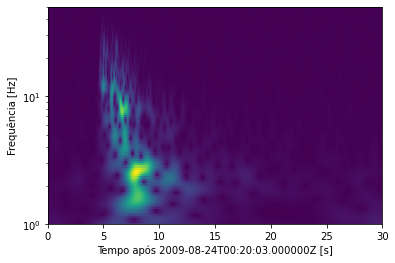

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt # continuous wavelet transform

st = obspy.read() # pega o exemplo
tr = st[0]
npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 50

scalogram = cwt(tr.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0])
    )

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Tempo após %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequência [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

# Time Frequency Misfit

## Gráfico da representação da Time Frequency

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1501: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfr = ax_tfr.pcolormesh(x, y, _tfr[itr], cmap=cmap)


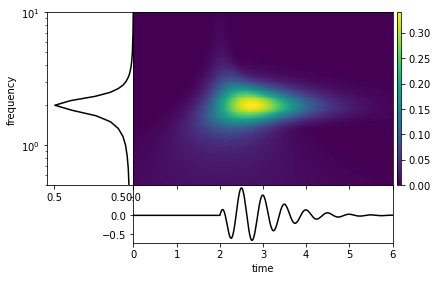

In [5]:
import numpy as np

from obspy.signal.tf_misfit import plot_tfr # time frequency misfit


# constantes gerais
tmax = 6.
dt = 0.01
npts = int(tmax / dt + 1)
t = np.linspace(0., tmax, npts)

fmin = .5
fmax = 10

# constantes para o sinal
A1 = 4.
t1 = 2.
f1 = 2.
phi1 = 0.

# gera o signal
H1 = (np.sign(t - t1) + 1) / 2
st1 = A1 * (t - t1) * np.exp(-2 * (t - t1))
st1 *= np.cos(2. * np.pi * f1 * (t - t1) + phi1 * np.pi) * H1

plot_tfr(st1, dt=dt, fmin=fmin, fmax=fmax)

In [7]:
st1.shape

(601,)

## Gráfico do Time Frequency Misfits

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1022: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfem = ax_tfem.pcolormesh(x, y, _tfem[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1040: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfpm = ax_tfpm.pcolormesh(x, y, _tfpm[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:

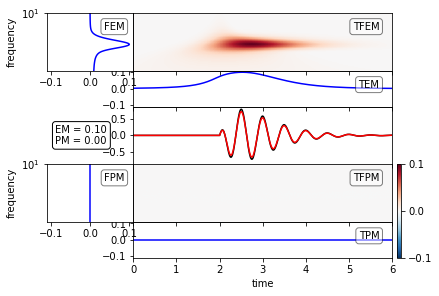

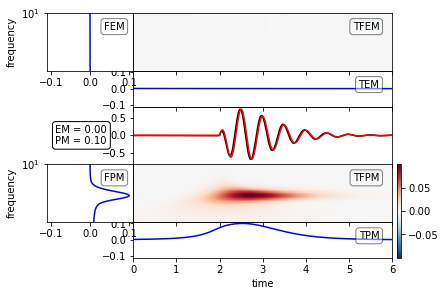

In [8]:
# Time Frequency Misfits são apropriadas para pequenas diferenças de sinais
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# erro de amplitude e fase
phase_shift = 0.1
amp_fac = 1.1

# sinal de referência
st2 = st1.copy()

# gera sinal analítico (transformada hilbert) e adiciona deslocamento de fase
st1p = hilbert(st1)
st1p = np.real(np.abs(st1p) * \
        np.exp((np.angle(st1p) + phase_shift * np.pi) * 1j))

# sinal com erro de amplitude
st1a = st1 * amp_fac

plot_tf_misfits(st1a, st2, dt=dt, fmin=fmin, fmax=fmax, show=False)
plot_tf_misfits(st1p, st2, dt=dt, fmin=fmin, fmax=fmax, show=False)

plt.show()

## Gráfico do Time Frequency Goodness-Of-Fit

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1282: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfeg = ax_tfeg.pcolormesh(x, y, _tfeg[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1300: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfpg = ax_tfpg.pcolormesh(x, y, _tfpg[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:

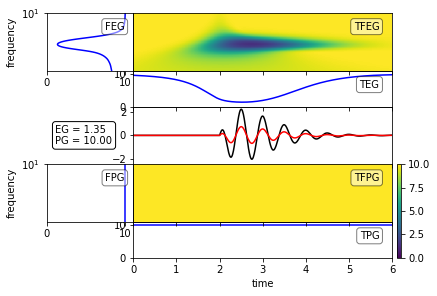

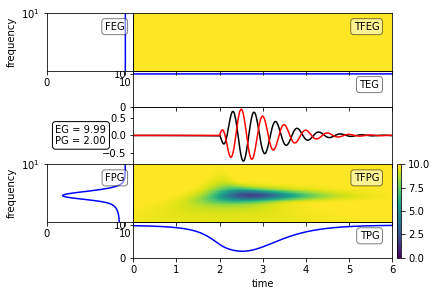

In [9]:
# o Time Frequency Goodness-Of-Fit é apropriado para grandes diferenças de sinais
from obspy.signal.tf_misfit import plot_tf_gofs

# erro de amplitude e fase
phase_shift = 0.8
amp_fac = 3.

# gera sinal analítico (transformada hilbert) e adiciona deslocamento de fase
st1p = hilbert(st1)
st1p = np.real(np.abs(st1p) * \
        np.exp((np.angle(st1p) + phase_shift * np.pi) * 1j))

# signal com erro de amplitude
st1a = st1 * amp_fac

plot_tf_gofs(st1a, st2, dt=dt, fmin=fmin, fmax=fmax, show=False)
plot_tf_gofs(st1p, st2, dt=dt, fmin=fmin, fmax=fmax, show=False)

plt.show()

## Dados com multicomponentes

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1022: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfem = ax_tfem.pcolormesh(x, y, _tfem[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1040: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfpm = ax_tfpm.pcolormesh(x, y, _tfpm[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:

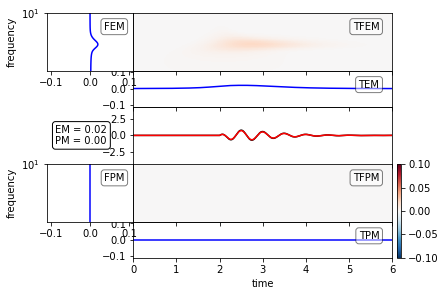

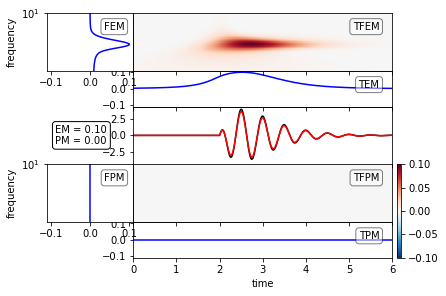

In [10]:
# para dados multicomponentes e normalização global dos misfits, os eixos são escalados de acordo
# erro de amplitude
amp_fac = 1.1

# sinal de referência
st2_1 = st1.copy()
st2_2 = st1.copy() * 5.
st2 = np.c_[st2_1, st2_2].T

# sinal com erro de amplitude
st1a = st2 * amp_fac

plot_tf_misfits(st1a, st2, dt=dt, fmin=fmin, fmax=fmax)

## Normalização local

C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1022: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfem = ax_tfem.pcolormesh(x, y, _tfem[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:1040: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img_tfpm = ax_tfpm.pcolormesh(x, y, _tfpm[itr], cmap=cmap)
C:\Users\enzoa\anaconda3\envs\AINOA\lib\site-packages\obspy\signal\tf_misfit.py:

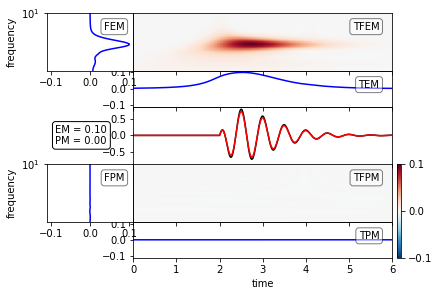

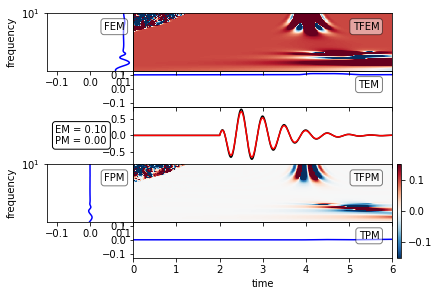

In [11]:
# normalização local permmite resolver intervalos de frequência e tempo longe das
# maiores amplitudes de onda, mas tende a produzir artrefatos em regiões quando não tem energia
# erro de amplitude e fase
amp_fac = 1.1

ste = 0.001 * A1 * np.exp(- (10 * (t - 2. * t1)) ** 2) \

# sinal de referência
st2 = st1.copy()

# sinal com amplitude + pequena adição de pulso depois de 4 segundos
st1a = st1 * amp_fac + ste

plot_tf_misfits(st1a, st2, dt=dt, fmin=fmin, fmax=fmax, show=False)
plot_tf_misfits(st1a, st2, dt=dt, fmin=fmin, fmax=fmax, norm='local',
               clim=0.15, show=False)

plt.show()

# Traçado do Tempo e Caminho do Raio

## Traçado do Tempo

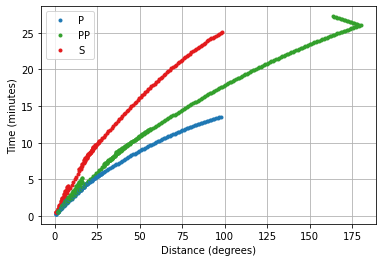

In [12]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=10, ax=ax, fig=fig,
                      phase_list=['P', 'PP', 'S'], npoints=200)

## Caminho do Raio Cartesiano

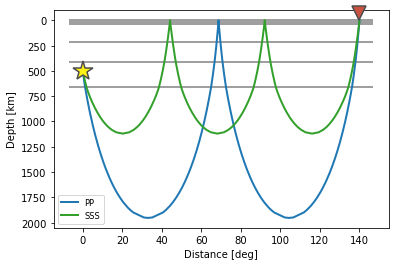

<AxesSubplot:xlabel='Distance [deg]', ylabel='Depth [km]'>

In [13]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(500, 140, phase_list=['PP', 'SSS'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['PP', 'SSS'],
                  plot_all=False, legend=True)

## Caminho do Raio Esférico

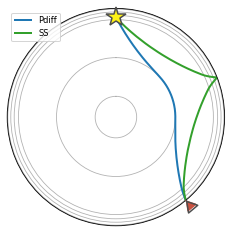

<PolarAxesSubplot:>

In [14]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(500, 140, phase_list=['Pdiff', 'SS'])
arrivals.plot_rays(plot_type='spherical', phase_list=['Pdiff', 'SS'],
                  legend=True)

## Caminhos de Raio para múltiplas distâncias

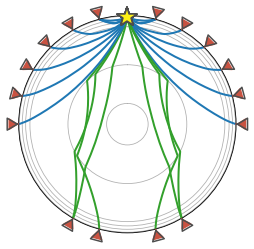

In [15]:
from obspy.taup.tau import plot_ray_paths
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=100, ax=ax, fig=fig, phase_list=['P', 'PKP'],
                   npoints=25)

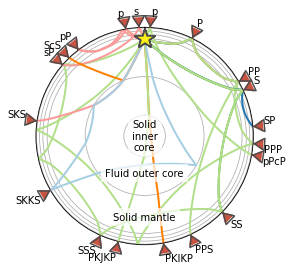

In [19]:
# gráfico personalizado
import numpy as np
import matplotlib.pyplot as plt

from obspy.taup import TauPyModel

PHASES = [
    # Phase, distance
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

model = TauPyModel(model='iasp91')

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# plot todas as fases pré-determinadas
for phase, distance in PHASES:
    arrivals = model.get_ray_paths(700, distance, phase_list=[phase])
    ax = arrivals.plot_rays(plot_type='spherical',
                            legend=False, label_arrivals=True,
                            plot_all=True,
                            show=False, ax=ax)
    
# Regiões de anotações
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

# Correção de escolha de correlação cruzada

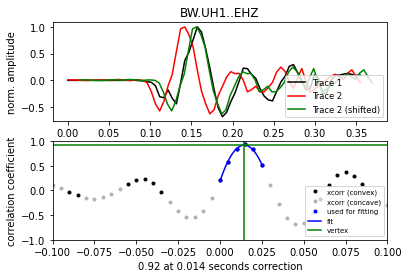

Sem pré-processamento:
  Correção do tempo para o conjunto 2: -0.014459
  Coeficiente de correlação: 0.92


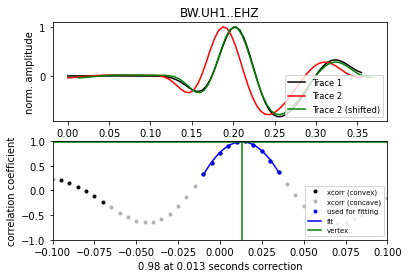

Pré filtragem com bandpass:
   Correção do tempo para o conjunto 2: -0.013025
   Coeficiente de correlação: 0.98


In [20]:
# alinhamento de ondas de início de fase de dois terremotos
from __future__ import print_function

import obspy
from obspy.signal.cross_correlation import xcorr_pick_correction # Cross-Correlation Pick Correction

# 2 pequenos terremotos
path = "https://examples.obspy.org/BW.UH1..EHZ.D.2010.147.%s.slist.gz"
st1 = obspy.read(path % ("a", ))
st2 = obspy.read(path % ("b", ))
# seleciona um único `trace` para usar correlação
# para evitar artefatos do preprocessamento deve-se ter algum dado a esquerda e
# a direita do janela atual usada na correlação
tr1 = st1.select(component="Z")[0]
tr2 = st2.select(component="Z")[0]
# estes são os tempos originais selecioandos durante a rotina de análise
t1 = obspy.UTCDateTime("2010-05-27T16:24:33.315000Z")
t2 = obspy.UTCDateTime("2010-05-27T16:27:30.585000Z")

# estima a correção do tempo para o conjunto 2 sem qualquer preprocessamento e abre
# uma janela de gráfico para validar visualmente os resultados
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True)
print("Sem pré-processamento:")
print("  Correção do tempo para o conjunto 2: %.6f" % dt)
print("  Coeficiente de correlação: %.2f" % coeff)
# estima a correção do tempo com pré-filtro bandpass
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True,
                                  filter="bandpass",
                                  filter_options={'freqmin': 1, 'freqmax': 10})
print("Pré filtragem com bandpass:")
print("   Correção do tempo para o conjunto 2: %.6f" % dt)
print("   Coeficiente de correlação: %.2f" % coeff)

# Detector de correlação cruzada

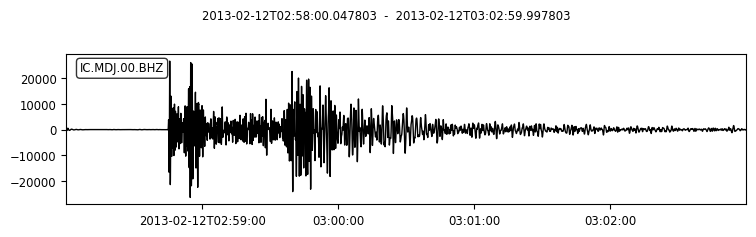

In [22]:
# neste exemplo vamos determianr o horário de origem do teste nuclear em 2017 da Coreia do Norte
# usando como padrão um outro teste em 2013
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector

template = read('https://examples.obspy.org/IC.MDJ.2013.043.mseed')
template.filter('bandpass', freqmin=0.5, freqmax=2)
template.plot();

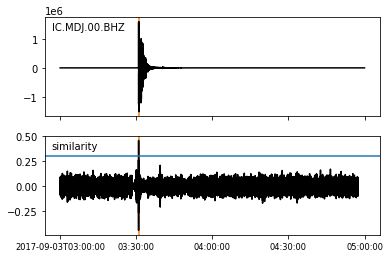

In [23]:
pick = UTC('2013-02-12T02:58:44.95')
template.trim(pick, pick + 150)

stream = read('https://examples.obspy.org/IC.MDJ.2017.246.mseed')
stream.filter('bandpass', freqmin=0.5, freqmax=2)
height = 0.3 # limiar de similaridade
distance = 10 # distância entre detecções em segundos
detections, sims = correlation_detector(stream, template, height, distance, plot=stream)

In [24]:
utc_nuclear_test_2013 = UTC('2013-02-12T02:57:51')
height = 0.2 # limiar inferior
detections, sims = correlation_detector(
        stream, template, height, distance, template_times=utc_nuclear_test_2013)
detections

[{'time': 2017-09-03T03:30:01.371731Z,
  'similarity': 0.46020218652131634,
  'template_id': 0},
 {'time': 2017-09-03T03:38:31.821731Z,
  'similarity': 0.21099726068286609,
  'template_id': 0}]

# Detecção de múltiplas estações de swarm earthquakes com múltiplos modelos

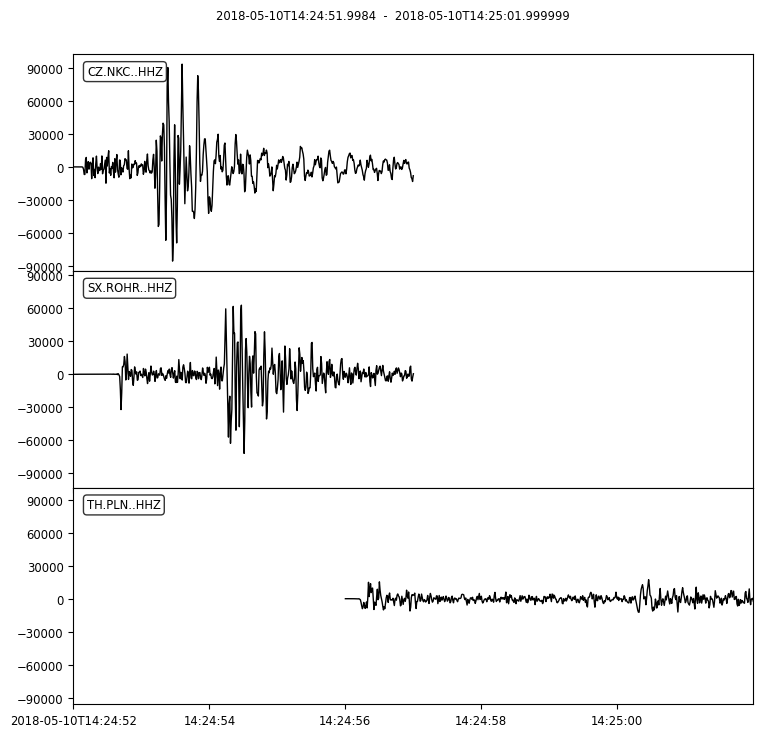

In [26]:
from obspy import read, Trace, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector

stream = read('https://examples.obspy.org/NKC_PLN_ROHR.HHZ.2018.130.mseed')
stream.filter('highpass', freq=1, zerophase=True)

otimes = [UTC('2018-05-10 14:24:50'), UTC('2018-05-10 19:42:08')]
templates = []
for otime in otimes:
    template = stream.select(station='NKC').slice(otime + 2, otime + 7)
    template += stream.select(station='ROHR').slice(otime + 2, otime + 7)
    template += stream.select(station='PLN').slice(otime + 6, otime + 12)
    templates.append(template)
    
template_magnitudes = [2.9, 2.8]
template_names = ['1st template', '2nd template']
templates[0].plot();

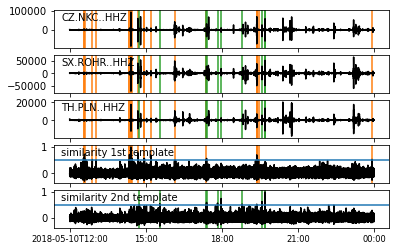

In [27]:
height = 0.5 # limiar de similaridade
distance = 10 # distância entre detecções em segundos
detections, sims = correlation_detector(stream, templates, height, distance, template_names=template_names, plot=stream)

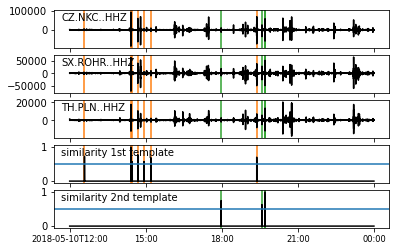

In [29]:
# função customizada para cálculo da similaridade
def similarity_component_thres(ccs, thres, num_components):
    """Retorna `Trace` com a média da correlação cruzada dos `Stream`
    e define valores como zero se o número de componentes acima do limiar não é alcançado"""
    ccmatrix = np.array([tr.data for tr in ccs])
    header = dict(sampling_rate=ccs[0].stats.sampling_rate,
                  starttime=ccs[0].stats.starttime)
    comp_thres = np.sum(ccmatrix > thres, axis=0) >= num_components
    data = np.mean(ccmatrix, axis=0) * comp_thres
    return Trace(data=data, header=header)

def simf(ccs):
    return similarity_component_thres(ccs, 0.5, 3)

detections, sims = correlation_detector(
        stream, templates, height, distance, similarity_func=simf, plot=stream,
        template_times=otimes, template_magnitudes=template_magnitudes, template_names=template_names)

In [30]:
detections

[{'time': 2018-05-10T12:34:56.631599Z,
  'similarity': 0.72489172487200093,
  'template_name': '1st template',
  'template_id': 0,
  'amplitude_ratio': 0.042826872986209574,
  'magnitude': 1.075621820592833},
 {'time': 2018-05-10T14:24:50.001599Z,
  'similarity': 1.0,
  'template_name': '1st template',
  'template_id': 0,
  'amplitude_ratio': 1.0,
  'magnitude': 2.8999999999999999},
 {'time': 2018-05-10T14:27:50.921599Z,
  'similarity': 0.57155043392492244,
  'template_name': '1st template',
  'template_id': 0,
  'amplitude_ratio': 0.019130460518598905,
  'magnitude': 0.60896723296053024},
 {'time': 2018-05-10T14:41:07.691599Z,
  'similarity': 0.77287907439378956,
  'template_name': '1st template',
  'template_id': 0,
  'amplitude_ratio': 0.57507924545222078,
  'magnitude': 2.5796369256528813},
 {'time': 2018-05-10T14:55:50.001599Z,
  'similarity': 0.57467717600498247,
  'template_name': '1st template',
  'template_id': 0,
  'amplitude_ratio': 0.078631249252299695,
  'magnitude': 1.427

# Manipulação de etiquetas personalizadas definidas no QuakeML e no catálogo ObsPy / eventos framework

>Tem um recurso semelhante usando o invetory:
https://docs.obspy.org/tutorial/code_snippets/stationxml_custom_tags.html

In [34]:
# Escrevendo um arquivo xml
from obspy import Catalog, UTCDateTime

extra = {'my_tag': {'value': True,
                    'namespace': 'http://some-page.de/xmlns/1.0',
                    'attrib': {'{http://some-page.de/xmlns/1.0}my_attrib1': '123.4',
                               '{http://some-page.de/xmlns/1.0}my_attrib2': '567'}},
         'my_tag_2': {'value': u'True',
                     'namespace': 'http://some-page.de/xmlns/1.0'},
         'my_tag_3': {'value': 1,
                      'namespace': 'http://some-page.de/xmlns/1.0'},
         'my_tag_4': {'value': UTCDateTime('2013-01-02T13:12:14.600000Z'),
                      'namespace': 'http://test.org/xmlns/0.1'},
         'my_attribute': {'value': 'my_attribute_value',
                          'type': 'attribute',
                          'namespace': 'http://test.org/xmlns/0.1'}}

cat = Catalog()
cat.extra = extra
cat.write('my_catalog.xml', format='QUAKEML',
          nsmap={'my_ns': 'http://test.org/xmlns/0.1'})

In [35]:
# Lendo o arquivo xml como eventos
from obspy import read_events

cat = read_events('my_catalog.xml')
print(cat.extra)

AttribDict({'my_tag_4': AttribDict({'value': '2013-01-02T13:12:14.600000Z', 'namespace': 'http://test.org/xmlns/0.1'}), 'my_tag': AttribDict({'value': 'true', 'namespace': 'http://some-page.de/xmlns/1.0', 'attrib': {'{http://some-page.de/xmlns/1.0}my_attrib1': '123.4', '{http://some-page.de/xmlns/1.0}my_attrib2': '567'}}), 'my_tag_2': AttribDict({'value': 'True', 'namespace': 'http://some-page.de/xmlns/1.0'}), 'my_tag_3': AttribDict({'value': '1', 'namespace': 'http://some-page.de/xmlns/1.0'}), 'my_attribute': AttribDict({'value': 'my_attribute_value', 'namespace': 'http://test.org/xmlns/0.1', 'type': 'attribute'})})


In [36]:
# alinhando etiquetas personalizadas
from obspy import Catalog
from obspy.core import AttribDict

ns = 'http://some-page.de/xmlns/1.0'

my_tag = AttribDict()
my_tag.namespace = ns
my_tag.value = AttribDict()

my_tag.value.my_nested_tag1 = AttribDict()
my_tag.value.my_nested_tag1.namespace = ns
my_tag.value.my_nested_tag1.value = 1.23E+10

my_tag.value.my_nested_tag2 = AttribDict()
my_tag.value.my_nested_tag2.namespace = ns
my_tag.value.my_nested_tag2.value = True

cat = Catalog()
cat.extra = AttribDict()
cat.extra.my_tag = my_tag
cat.write('my_catalog.xml', 'QUAKEML')

In [37]:
# Lendo o novo arquivo
from obspy import read_events

cat = read_events('my_catalog.xml')
print(cat.extra.my_tag.value.my_nested_tag1.value)
print(cat.extra.my_tag.value.my_nested_tag2.value)

12300000000.0
true


In [40]:
# a ordem pode ser controlada com o `OrderedDict`
from collections import OrderedDict
from obspy.core.event import Catalog, Event

ns = 'http://some-page.de/xmlns/1.0'

my_tag1 = {'namespace': ns, 'value': 'some value 1'}
my_tag2 = {'namespace': ns, 'value': 'some value 2'}

event = Event()
cat = Catalog(events=[event])
event.extra = OrderedDict()
event.extra['myFirstExtraTag'] = my_tag2
event.extra['mySecondExtraTag'] = my_tag1
cat.write('my_catalog.xml', 'QUAKEML')

# Criando um arquivo StationXML do zero

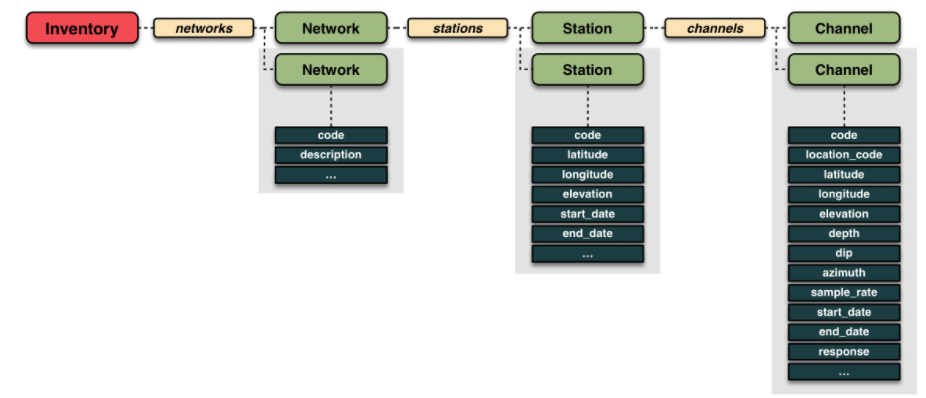

In [42]:
import obspy
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.clients.nrl import NRL

# Primeiro cria-se os vários objetos. Seguindo a hierárquia dos arquivos StationXML
inv = Inventory(
    # as `networks` serão adicionados depois
    networks=[],
    # a fonte deve ser o id de quem criou o arquivo
    source="ObsPy-Tutorial")

net = Network(
    # esta é a código `network` de acordo com o padrão SEED
    code="XX",
    # a lista de `stations` será adicionada depois
    stations=[],
    description="Estação teste.",
    # Datas de início e fim são opcionais.
    start_date=obspy.UTCDateTime(2016, 1, 2))

sta = Station(
    # este é o código `station` de acordo com o padrão SEED
    code="ABC",
    latitude=1.0,
    longitude=2.0,
    elevation=345.0,
    creation_date=obspy.UTCDateTime(2016, 1, 2),
    site=Site(name="Primeira Estação"))

cha = Channel(
    # este é o código `channel` de acordo com o padrão SEED
    code="HHZ",
    # Esta e é o código `location` de acordo com o padrão SEED
    location_code="",
    # Note que estas coordenadas podem diferir das coordenadas da `station`
    latitude=1.0,
    longitude=2.0,
    elevation=345.0,
    depth=10.0,
    azimuth=0.0,
    dip=-90.0,
    sample_rate=200
    )

nrl = NRL()

response = nrl.get_response( # doctest: +SKIP
    sensor_keys=['Streckeisen', 'STS-1', '360 seconds'],
    datalogger_keys=['REF TEK', 'RT 130 & 130-SMA', '1', '200'])

# Unindo todos os objetos
cha.response = response
sta.channels.append(cha)
net.stations.append(sta)
inv.networks.append(net)

# Escrevendo o arquivo StationXML. E forçando uma validação para verificar
# se o arquivo está no padrão
inv.write("station.xml", format="stationxml", validate=True)

# Conectando a um Server SeedLink

https://docs.obspy.org/tutorial/code_snippets/easyseedlink.html
funções: create_client
classe: EasySeedLinkClient